In [1]:
from commonfunctions import *
import numpy as np
import skimage
import skimage.io as io
import matplotlib.pyplot as plt
from skimage import filters, feature
from skimage.color import rgb2gray
from skimage.morphology import binary_erosion, binary_dilation, binary_closing, binary_opening, skeletonize, thin
from skimage.measure import find_contours
from skimage.draw import rectangle
import cv2 as cv

# Convolution:
from scipy.signal import convolve2d
from scipy import fftpack
import math

%matplotlib inline
%load_ext autoreload
%autoreload 2


In [16]:
from scipy import fftpack
# inverse_fft_mat = fftpack.ifft2(freq_domain_mat) # Inverse FFT is a fast version of inverse DFT

#to convolve the image with the filter
# need to convert to grayscale before use
from scipy.signal import convolve2d
def apply_filter_in_freq(img, f):
    img_in_freq = fftpack.fft2(img)

    # we supply the img shape here to make both the filter and img have the same shape to be able to multiply
    filter_in_freq = fftpack.fft2(f, img.shape)
    filtered_img_in_freq = np.multiply(img_in_freq, filter_in_freq)
    filtered_img = fftpack.ifft2(filtered_img_in_freq)
    return np.abs(filtered_img)

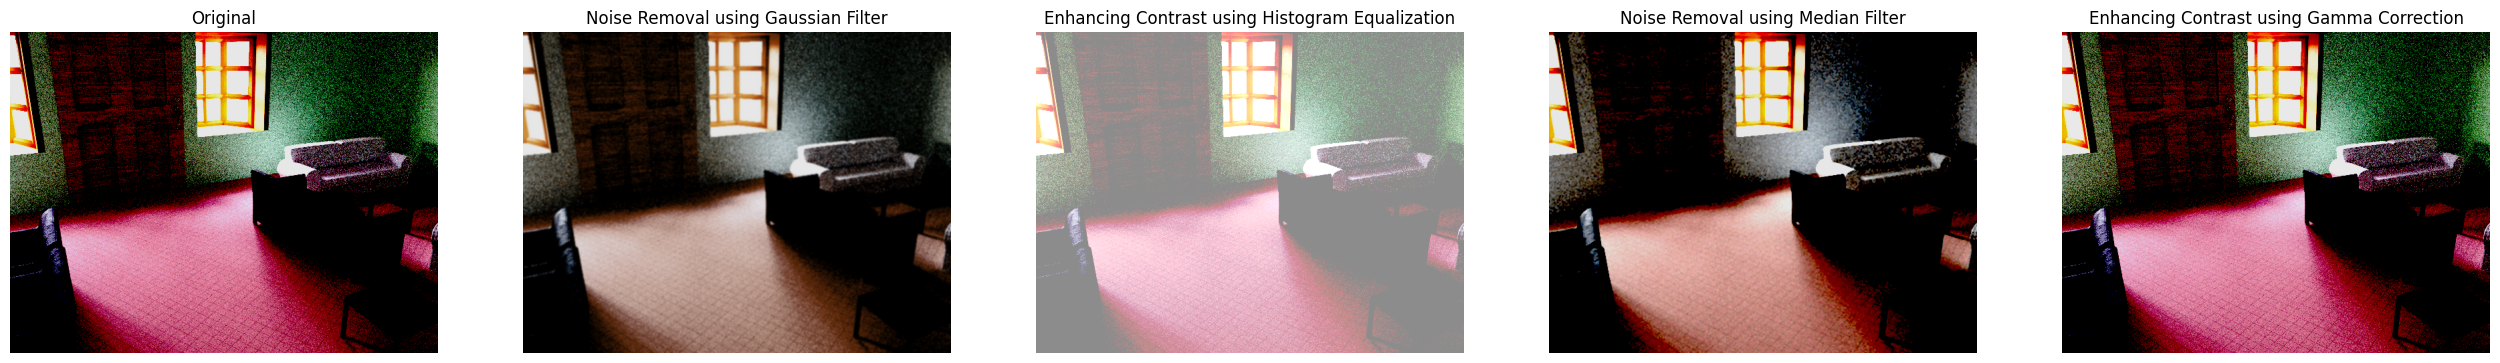

In [24]:
q1 = io.imread('./Q1.png')[:, :, :3]

q1_gaussian = skimage.filters.gaussian(q1)
q1_equ = skimage.exposure.equalize_hist(q1)
q1_median = skimage.filters.median(q1)
q1_gamma = skimage.exposure.adjust_gamma(q1, gamma=0.9)

show_images([q1, q1_gaussian, q1_equ, q1_median, q1_gamma], ['Original', 'Noise Removal using Gaussian Filter', 'Enhancing Contrast using Histogram Equalization', 'Noise Removal using Median Filter', 'Enhancing Contrast using Gamma Correction'])


In [33]:
q2 = io.imread('./Q2.png')[:, :, :3]
q2_exp = io.imread('./Q2-Explain.png')[:, :, :3]

q2_gray = rgb2gray(q2)

lines = cv.HoughLinesP((q2_gray * 255).astype(np.uint8), 1, np.pi / 180, 100, minLineLength=50, maxLineGap=10) # TODO: Understand the parameters
#1 param: image, 2 param: rho, 3 param: theta, 4 param: threshold, 5 param: minLineLength, 6 param: maxLineGap
print(lines[0][0])
print(lines[1][0])
print(lines[2][0])
print(lines[3][0])
print(lines[4][0])
print(lines[5][0])
print(lines[6][0])
print(len(lines))



[ 22   0 254 287]
[ 24   0 256 287]
[ 19   0 251 287]
[  0 257 281  30]
[ 20   0 253 287]
[  0 252 281  25]
[  0 254 281  26]
34


In [1]:
#Q2  fall 22
import commonfunctions as cf
#Create a grayscale image for each of the following histograms 
# first has  10k at 0 and 20k at 100 and 10k at 200
hist1 = np.zeros((200, 200), np.uint8)
hist1[:, :50] = 0
hist1[:, 50:150] = 100
hist1[:, 150:] = 200

show_images([hist1], ['Histogram 1'])


#b)	Linear line ( x: [0,255], y: [0,255] ) [hint: try creating an image of size 255x102]
# 0.5 255 rows   255 col
hist2 = np.zeros((127, 255), np.uint8)
c1=0 #row
c2=0    #col
for i in range(255):
    for j in range(i):
        hist2[c1%127][c2]=i
        c2+=1
        if c2==255:
            c1+=1
            c2=0
hist2=255-hist2
    

cf.showHist(hist2)
show_images([hist2], ['Histogram 2'])

NameError: name 'np' is not defined